In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('../../Datasets/Digit_Recognition/train.csv/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
y=df['label']
X=df.drop('label',axis=1)

In [7]:
X.shape

(42000, 784)

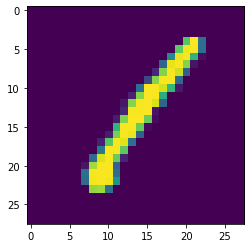

In [8]:
img0=np.array(X.iloc[0]).reshape(28,28)
plt.imshow(img0)

In [9]:
np.array(X.iloc[0]).reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [10]:
X_scaled=X/255  #scalling X_scaled=(x-xmin/xmax-xmin)  here xmin=0, xmax=255

In [11]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat=to_categorical(y,num_classes=10)

In [14]:
y_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [15]:
y_cat.shape

(42000, 10)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model=Sequential()
model.add(Dense(16, activation='relu',input_shape=(784,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',metrics=['Accuracy'])

In [22]:
hist=model.fit(X_scaled,y_cat,epochs=15, batch_size=32)

Epoch 1/15
1313/1313 [==============================] - 1s 743us/step - loss: 0.1387 - Accuracy: 0.9592
Epoch 2/15
1313/1313 [==============================] - 1s 779us/step - loss: 0.1332 - Accuracy: 0.9614
Epoch 3/15
1313/1313 [==============================] - 1s 714us/step - loss: 0.1305 - Accuracy: 0.9605
Epoch 4/15
1313/1313 [==============================] - 1s 727us/step - loss: 0.1277 - Accuracy: 0.9623
Epoch 5/15
1313/1313 [==============================] - 1s 716us/step - loss: 0.1237 - Accuracy: 0.9635
Epoch 6/15
1313/1313 [==============================] - 1s 703us/step - loss: 0.1210 - Accuracy: 0.9645
Epoch 7/15
1313/1313 [==============================] - 1s 701us/step - loss: 0.1190 - Accuracy: 0.9646
Epoch 8/15
1313/1313 [==============================] - 1s 740us/step - loss: 0.1169 - Accuracy: 0.9660
Epoch 9/15
1313/1313 [==============================] - 1s 713us/step - loss: 0.1140 - Accuracy: 0.9667
Epoch 10/15
1313/1313 [==============================] - 1s 738u

In [24]:
hist.history['loss']

[0.13866785168647766,
 0.13318338990211487,
 0.13050992786884308,
 0.1277376413345337,
 0.1237400472164154,
 0.12096396088600159,
 0.11896969377994537,
 0.11689978837966919,
 0.11396215856075287,
 0.11269396543502808,
 0.11125186085700989,
 0.10911135375499725,
 0.10702582448720932,
 0.10684133321046829,
 0.10565554350614548]

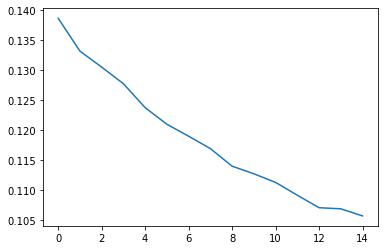

In [26]:
plt.plot(hist.history['loss'])

In [20]:
model.predict(X_scaled.iloc[:5,:])  # first 5 rows and all columns

array([[2.4138451e-09, 9.9196613e-01, 3.6360801e-04, 1.9240899e-04,
        1.7950914e-06, 2.2761191e-05, 7.0235615e-07, 8.6469045e-06,
        7.4422541e-03, 1.7679438e-06],
       [9.9999881e-01, 1.3292034e-21, 4.0155314e-08, 1.1050648e-11,
        1.5641964e-13, 9.1431033e-08, 2.9980066e-10, 1.3789750e-09,
        2.3805214e-08, 1.0736987e-06],
       [6.4064948e-11, 9.9977201e-01, 3.2349728e-06, 4.4781016e-05,
        1.5303680e-06, 5.1063595e-05, 7.9653631e-08, 2.8619179e-05,
        8.4571955e-05, 1.4083045e-05],
       [3.3938368e-03, 3.5966010e-04, 3.8318358e-02, 8.6881511e-04,
        7.3418957e-01, 2.6636999e-02, 1.6656050e-01, 1.2412705e-02,
        5.6183473e-03, 1.1641175e-02],
       [1.0000000e+00, 1.7463181e-24, 1.1545584e-09, 8.1759220e-13,
        5.1038165e-17, 3.0250888e-09, 1.6763109e-12, 2.0680575e-12,
        1.2606214e-09, 3.0718013e-09]], dtype=float32)

In [21]:
model.predict(X_scaled.iloc[:5,:]).argmax(axis=1)  #argmax used to give 1st five actual values

array([1, 0, 1, 4, 0], dtype=int64)

### Handwritten Image

In [28]:
import cv2

In [32]:
img=cv2.imread('../../Datasets/Digit_Recognition/Handwritten/2.jpg',0) #read image  ,0 mean read image as greyscale prev it's RGB

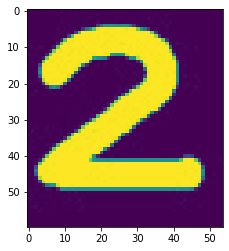

In [33]:
plt.imshow(img)

In [34]:
img.shape

(60, 54)

In [35]:
img=cv2.resize(img,(28,28))  #resize of pixels

In [36]:
img.shape

(28, 28)

In [37]:
img=img/255

In [38]:
model.predict(img.reshape(1,784)).argmax() 

2

In [49]:
def get_prediction(path):
    img=cv2.imread(path,0)
    img=cv2.resize(img,(28,28))/255
    return model.predict(img.reshape(1,784)).argmax()

In [50]:
get_prediction('../../Datasets/Digit_Recognition/Handwritten/7.jpg')

3

In [51]:
import os

In [52]:
folder_location='../../Datasets/Digit_Recognition/Handwritten/'

In [53]:
file_names=os.listdir(folder_location)

In [54]:
for file in file_names:
    digit=get_prediction(folder_location+file)
    print(file,'\t--->',digit)

0.jpg 	---> 3
00.jpg 	---> 3
1.jpg 	---> 2
11.jpg 	---> 2
2.jpg 	---> 2
22.jpg 	---> 2
3.jpg 	---> 3
33.jpg 	---> 3
4.jpg 	---> 9
44.jpg 	---> 9
5.jpg 	---> 3
55.jpg 	---> 3
6.jpg 	---> 5
66.jpg 	---> 5
7.jpg 	---> 3
77.jpg 	---> 3
8.jpg 	---> 3
88.jpg 	---> 3
9.jpg 	---> 3
99.jpg 	---> 3
